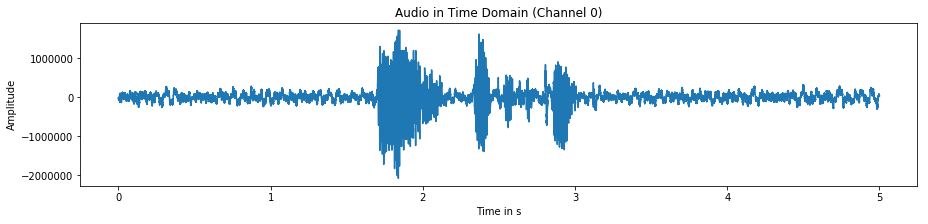

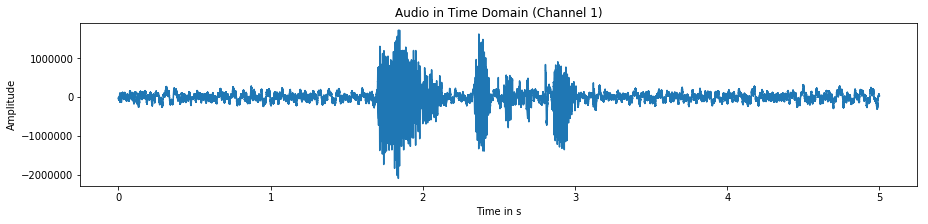

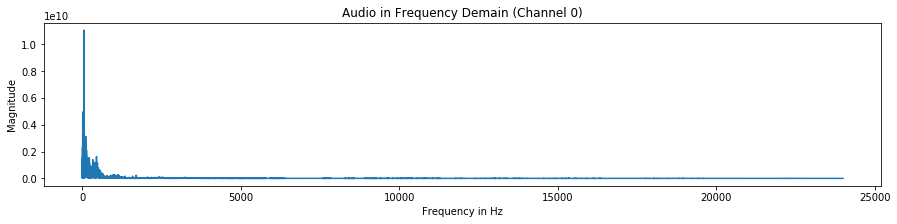

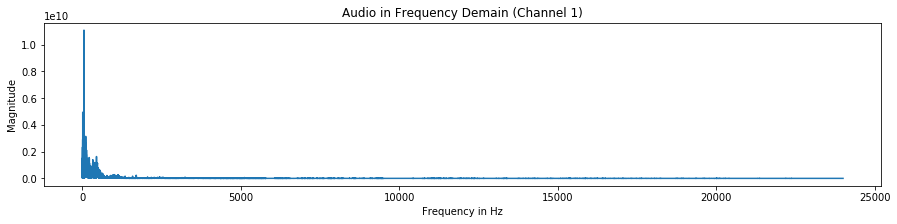

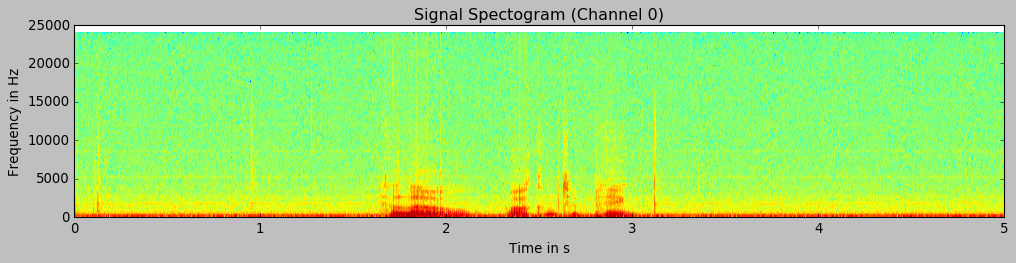

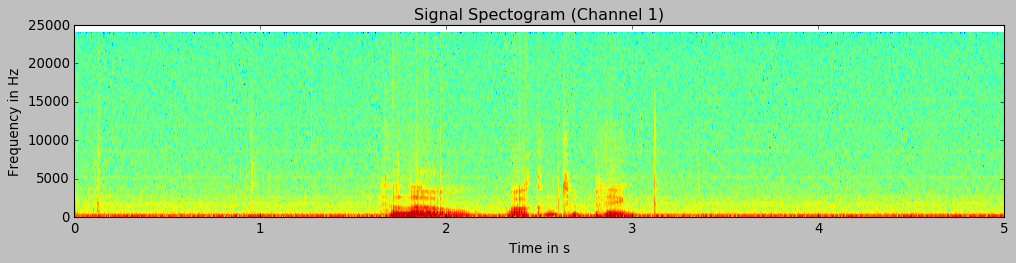

In [1]:
from pynq.overlays.base import BaseOverlay
base = BaseOverlay("base.bit")

pAudio = base.audio

"""Users can select either LINE_IN, or HP+MIC as the input port. 
In the following example, we choose LINE_IN. To choose MIC"""

##pAudio.select_microphone()
pAudio.select_line_in()
pAudio.bypass(seconds=5)

#Record a 5-second sample and save it into a file.
pAudio.record(5)		
pAudio.save("recording_1.wav")

#Load a sample and play the loaded sample
pAudio.load("/home/xilinx/jupyter_notebooks/base/audio/recording_0.wav")
pAudio.play()

#Since the samples are in 24-bit PCM format, users can play the audio directly in notebook
from IPython.display import Audio as IPAudio
IPAudio("/home/xilinx/jupyter_notebooks/base/audio/recording_0.wav")

#Plotting PCM data
%matplotlib inline
import wave
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.fftpack import fft

wav_path = "/home/xilinx/jupyter_notebooks/base/audio/recording_0.wav"
with wave.open(wav_path, 'r') as wav_file:
    raw_frames = wav_file.readframes(-1)
    num_frames = wav_file.getnframes()
    num_channels = wav_file.getnchannels()
    sample_rate = wav_file.getframerate()
    sample_width = wav_file.getsampwidth()
    
temp_buffer = np.empty((num_frames, num_channels, 4), dtype=np.uint8)
raw_bytes = np.frombuffer(raw_frames, dtype=np.uint8)
temp_buffer[:, :, :sample_width] = raw_bytes.reshape(-1, num_channels, 
                                                    sample_width)
temp_buffer[:, :, sample_width:] = \
    (temp_buffer[:, :, sample_width-1:sample_width] >> 7) * 255
frames = temp_buffer.view('<i4').reshape(temp_buffer.shape[:-1])

#Amplitude over time
for channel_index in range(num_channels):
    plt.figure(num=None, figsize=(15, 3))
    plt.title('Audio in Time Domain (Channel {})'.format(channel_index))
    plt.xlabel('Time in s')
    plt.ylabel('Amplitude')
    time_axis = np.arange(0, num_frames/sample_rate, 1/sample_rate)
    plt.plot(time_axis, frames[:, channel_index])
    plt.show()
	
#Frequency spectrum
for channel_index in range(num_channels):
    plt.figure(num=None, figsize=(15, 3))
    plt.title('Audio in Frequency Demain (Channel {})'.format(channel_index))
    plt.xlabel('Frequency in Hz')
    plt.ylabel('Magnitude')
    temp = fft(frames[:, channel_index])
    yf = temp[1:len(temp)//2]
    xf = np.linspace(0.0, sample_rate/2, len(yf))
    plt.plot(xf, abs(yf))
    plt.show()
	
#Frequency spectrum over time
for channel_index in range(num_channels):
    np.seterr(divide='ignore', invalid='ignore')
    matplotlib.style.use("classic")
    plt.figure(num=None, figsize=(15, 3))
    plt.title('Signal Spectogram (Channel {})'.format(channel_index))
    plt.xlabel('Time in s')
    plt.ylabel('Frequency in Hz')
    plt.specgram(frames[:, channel_index], Fs=sample_rate)

